# Import Packages & Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("C:/Users/Jaroslav/PycharmProjects/REAS/Reas_data_task.csv", sep = ",")
df = pd.DataFrame(data)
df.head()

,unitId,date,long,lat,area,priceNoVat,municipalityCode,municipalityName,districtCode,districtName,...,floors,adCondition,adDisposition,adFloorArea,adConstructionType,adOwnership,adFloorNumber,adFloorsCount,adElevator,adBalconyArea
0,18864007-1993-6,2019-05-03T09:32:15.000Z,16.888784,48.759956,56.0,1251000.0,584291,Břeclav,3704,Břeclav,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47506181-3925-16,2020-02-04T07:21:26.000Z,16.053833,48.859261,51.0,3737500.0,593711,Znojmo,3713,Znojmo,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27236471-2891-32,2019-03-05T08:48:48.000Z,16.683639,49.213511,78.3,2165000.0,582786,Brno,3702,Brno-město,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15125122-1406-73,2020-12-15T06:11:10.000Z,16.643724,49.361001,55.4,2241000.0,581283,Blansko,3701,Blansko,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19354223-821-8,2020-04-21T08:41:28.000Z,16.677672,49.179661,40.0,3192000.0,582786,Brno,3702,Brno-město,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Clean & Explore Data

In [3]:
df.count()

unitId                5000
date                  5000
long                  5000
lat                   5000
area                  5000
priceNoVat            5000
municipalityCode      5000
municipalityName      5000
districtCode          5000
districtName          5000
regionCode            5000
regionName            5000
constructionType      5000
elevator              5000
finishedAt            1773
heatingKind           5000
floors                4640
adCondition            400
adDisposition          426
adFloorArea            416
adConstructionType     426
adOwnership            426
adFloorNumber          425
adFloorsCount          200
adElevator              85
adBalconyArea           19
dtype: int64

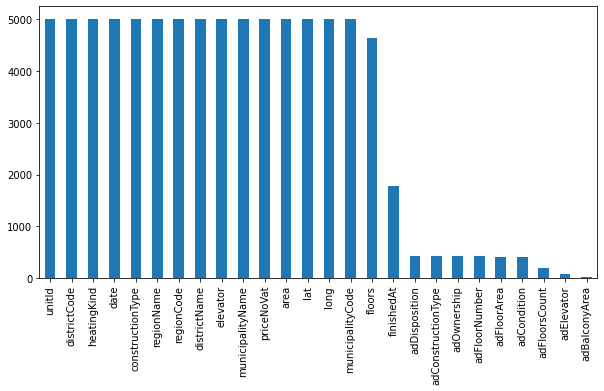

In [4]:
df.count().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.savefig("variables_val_count.png", dpi=400)

* Columns with less than 500 valid data points are dropped. That is: ['adCondition', 'adDisposition', 'adFloorArea', 'adConstructionType', 'adOwnership', 'adFloorNumber', 'adFloorsCount', 'adElevator', 'adBalconyArea']
*  To floors are added values form AdFloorsCount

In [5]:
for i in df.index:
    if df.floors.isnull()[i]:
        df.floors[i] = df.adFloorsCount[i]
df.count()

C:\Users\Jaroslav\AppData\Local\Temp\ipykernel_14260\1865933381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.floors[i] = df.adFloorsCount[i]


unitId                5000
date                  5000
long                  5000
lat                   5000
area                  5000
priceNoVat            5000
municipalityCode      5000
municipalityName      5000
districtCode          5000
districtName          5000
regionCode            5000
regionName            5000
constructionType      5000
elevator              5000
finishedAt            1773
heatingKind           5000
floors                4661
adCondition            400
adDisposition          426
adFloorArea            416
adConstructionType     426
adOwnership            426
adFloorNumber          425
adFloorsCount          200
adElevator              85
adBalconyArea           19
dtype: int64

In [6]:
df.index[1]

1

In [7]:
print(list(df.count()[df.count()<500].index))
df = df.drop(list(df.count()[df.count()<500].index), axis=1)

['adCondition', 'adDisposition', 'adFloorArea', 'adConstructionType', 'adOwnership', 'adFloorNumber', 'adFloorsCount', 'adElevator', 'adBalconyArea']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unitId            5000 non-null   object 
 1   date              5000 non-null   object 
 2   long              5000 non-null   float64
 3   lat               5000 non-null   float64
 4   area              5000 non-null   float64
 5   priceNoVat        5000 non-null   float64
 6   municipalityCode  5000 non-null   int64  
 7   municipalityName  5000 non-null   object 
 8   districtCode      5000 non-null   int64  
 9   districtName      5000 non-null   object 
 10  regionCode        5000 non-null   int64  
 11  regionName        5000 non-null   object 
 12  constructionType  5000 non-null   object 
 13  elevator          5000 non-null   object 
 14  finishedAt        1773 non-null   object 
 15  heatingKind       5000 non-null   object 
 16  floors            4661 non-null   float64


* Converting dates to pandas datetime format

In [9]:
df.date[0]

'2019-05-03T09:32:15.000Z'

In [10]:
df['date'] = pd.to_datetime(df.date)
df['finishedAt'] = pd.to_datetime(df.finishedAt)
print('date[0] is: {}'.format(df.date[0]))
print('finishedAt[1] is: {}'.format(df.finishedAt[1]))

date[0] is: 2019-05-03 09:32:15+00:00
finishedAt[1] is: 2020-03-12 00:00:00+00:00


In [11]:
df.isna().sum()

unitId                 0
date                   0
long                   0
lat                    0
area                   0
priceNoVat             0
municipalityCode       0
municipalityName       0
districtCode           0
districtName           0
regionCode             0
regionName             0
constructionType       0
elevator               0
finishedAt          3227
heatingKind            0
floors               339
dtype: int64

# Check for duplicit ID
    * There are duplcit ID. But the reason is that 1 flat was sold more than once, at different time for different price. This is the case for 63 flats. They are listed bellow.

In [12]:
pd.Series(df.unitId.unique()).count()

4937

In [13]:
df.duplicated().sum()

0

In [14]:
df.duplicated('unitId').sum()

63

In [15]:
#flats lod more than once
df[df.duplicated('unitId')]

,unitId,date,long,lat,area,priceNoVat,municipalityCode,municipalityName,districtCode,districtName,regionCode,regionName,constructionType,elevator,finishedAt,heatingKind,floors
101,19129807-1260-2,2020-02-26 10:33:44+00:00,16.627662,49.215372,54.5,5180000.0,582786,Brno,3702,Brno-město,116,Jihomoravský kraj,panel,unknown,NaT,central_external,NaN
691,19252315-2368-32,2020-08-04 05:32:16+00:00,16.671396,49.203815,63.0,1970000.0,582786,Brno,3702,Brno-město,116,Jihomoravský kraj,panel,has_elevator,NaT,central_external,8.0
908,10951148-3414-8,2019-11-05 07:45:34+00:00,16.065091,48.838642,75.1,1694000.0,593711,Znojmo,3713,Znojmo,116,Jihomoravský kraj,panel,no_elevator,NaT,central_external,5.0
926,10945113-2784-1,2021-11-16 08:53:36+00:00,16.054701,48.847698,18.6,954000.0,593711,Znojmo,3713,Znojmo,116,Jihomoravský kraj,brick_stone_cinder_block,no_elevator,NaT,other,4.0
1345,19299028-425-23,2021-05-24 13:50:41+00:00,16.555956,49.176537,69.0,6887000.0,582786,Brno,3702,Brno-město,116,Jihomoravský kraj,panel,has_elevator,NaT,central_external,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4878,19144482-911-1,2020-09-21 12:27:38+00:00,16.516232,49.215644,70.2,2093500.0,582786,Brno,3702,Brno-město,116,Jihomoravský kraj,panel,has_elevator,NaT,central_external,9.0
4904,19146469-1111-4,2021-08-19 08:00:30+00:00,16.502059,49.218649,59.5,5864734.8,582786,Brno,3702,Brno-město,116,Jihomoravský kraj,panel,has_elevator,NaT,central_external,9.0
4943,10949950-3294-2,2021-07-15 09:17:23+00:00,16.062157,48.840797,58.1,2108274.0,593711,Znojmo,3713,Znojmo,116,Jihomoravský kraj,panel,no_elevator,NaT,central_external,4.0
4991,13592637-1008-18,2020-08-12 14:58:35+00:00,17.092495,48.917263,35.4,989000.0,586161,Dubňany,3706,Hodonín,116,Jihomoravský kraj,brick_stone_cinder_block,no_elevator,2021-12-01 00:00:00+00:00,central_internal,4.0


In [16]:
df[df.unitId.isin(df.unitId[df.duplicated('unitId')])].sort_values('unitId')

,unitId,date,long,lat,area,priceNoVat,municipalityCode,municipalityName,districtCode,districtName,regionCode,regionName,constructionType,elevator,finishedAt,heatingKind,floors
1827,10010718-1002-14,2021-02-04 15:00:02+00:00,16.505780,48.976520,63.0,4225000.00,584801,Pohořelice,3703,Brno-venkov,116,Jihomoravský kraj,brick_stone_cinder_block,no_elevator,NaT,central_internal,4.0
654,10010718-1002-14,2019-11-06 10:20:13+00:00,16.505780,48.976520,63.0,1244837.50,584801,Pohořelice,3703,Brno-venkov,116,Jihomoravský kraj,brick_stone_cinder_block,no_elevator,NaT,central_internal,4.0
3531,101076886-618-54,2021-10-26 05:16:32+00:00,16.600237,49.212579,89.9,5382000.00,582786,Brno,3702,Brno-město,116,Jihomoravský kraj,brick_cinder_block,has_elevator,2020-04-30 00:00:00+00:00,central_internal,8.0
4416,101076886-618-54,2020-09-03 05:19:19+00:00,16.600239,49.212580,89.9,10350500.00,582786,Brno,3702,Brno-město,116,Jihomoravský kraj,brick_cinder_block,has_elevator,2020-04-30 00:00:00+00:00,central_internal,8.0
4805,10146571-801-4,2019-06-13 06:48:29+00:00,16.730531,48.945794,58.7,1512500.00,584495,Hustopeče,3704,Břeclav,116,Jihomoravský kraj,unknown,unknown,NaT,other,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,97781347-194-39,2019-11-27 12:03:36+00:00,16.623303,49.155704,38.5,1051562.69,582786,Brno,3702,Brno-město,116,Jihomoravský kraj,other,no_elevator,2019-07-03 00:00:00+00:00,local,5.0
382,97781347-194-49,2021-10-26 13:55:37+00:00,16.623302,49.155702,43.2,3540000.00,582786,Brno,3702,Brno-město,116,Jihomoravský kraj,other,no_elevator,2019-07-03 00:00:00+00:00,local,5.0
2243,97781347-194-49,2019-12-06 06:47:21+00:00,16.623303,49.155704,43.2,2293405.90,582786,Brno,3702,Brno-město,116,Jihomoravský kraj,other,no_elevator,2019-07-03 00:00:00+00:00,local,5.0
1018,98811908-561-4,2021-04-19 07:38:41+00:00,16.561393,49.185401,22.2,16570950.00,582786,Brno,3702,Brno-město,116,Jihomoravský kraj,monolith,has_elevator,2019-10-01 00:00:00+00:00,central_internal,4.0


In [17]:
df.set_index(df['unitId'])

,unitId,date,long,lat,area,priceNoVat,municipalityCode,municipalityName,districtCode,districtName,regionCode,regionName,constructionType,elevator,finishedAt,heatingKind,floors
unitId,,,,,,,,,,,,,,,,,
18864007-1993-6,18864007-1993-6,2019-05-03 09:32:15+00:00,16.888784,48.759956,56.0,1251000.0,584291,Břeclav,3704,Břeclav,116,Jihomoravský kraj,brick_stone_cinder_block,no_elevator,NaT,other,3.0
47506181-3925-16,47506181-3925-16,2020-02-04 07:21:26+00:00,16.053833,48.859261,51.0,3737500.0,593711,Znojmo,3713,Znojmo,116,Jihomoravský kraj,brick_cinder_block,has_elevator,2020-03-12 00:00:00+00:00,central_internal,7.0
27236471-2891-32,27236471-2891-32,2019-03-05 08:48:48+00:00,16.683639,49.213511,78.3,2165000.0,582786,Brno,3702,Brno-město,116,Jihomoravský kraj,other,has_elevator,2009-01-07 00:00:00+00:00,central_internal,5.0
15125122-1406-73,15125122-1406-73,2020-12-15 06:11:10+00:00,16.643724,49.361001,55.4,2241000.0,581283,Blansko,3701,Blansko,116,Jihomoravský kraj,brick_stone_cinder_block,has_elevator,NaT,central_external,7.0
19354223-821-8,19354223-821-8,2020-04-21 08:41:28+00:00,16.677672,49.179661,40.0,3192000.0,582786,Brno,3702,Brno-město,116,Jihomoravský kraj,brick_stone_cinder_block,no_elevator,NaT,other,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19051034-660-40,19051034-660-40,2019-04-24 05:22:30+00:00,16.578067,49.166540,80.0,3048650.0,582786,Brno,3702,Brno-město,116,Jihomoravský kraj,panel,has_elevator,NaT,central_external,12.0
13444409-572-1,13444409-572-1,2021-08-05 06:41:37+00:00,17.179954,48.882406,36.4,895000.0,586528,Rohatec,3706,Hodonín,116,Jihomoravský kraj,brick_stone_cinder_block,no_elevator,NaT,central_internal,3.0
82375941-1032-2,82375941-1032-2,2019-02-12 07:57:47+00:00,16.488399,49.205578,103.0,3195000.0,582786,Brno,3702,Brno-město,116,Jihomoravský kraj,brick_cinder_block,no_elevator,2018-05-04 00:00:00+00:00,local,2.0


# Qualitative variables
 * municipalityCode, municipalityName, districtCode, districtName, regionCode, regionName, constructionType, elevator, heatingKind
1. Region, district, municipality
    * Check their values -> just 1 region -> region variables are dropped
    * Check if codes and names match for all cases (e.g. districtCode and districtName) -> data are correct
    * Check frequencies of flats within municipalities and districts (municipalities are probalby too detailed divison. For some municipalities there were sold just 1 flat)
    * Check if mean prices differ among districts
    * New variable districtTown

 * Recode NaNs
 * Check frequencies
 * Check relationships
    * Price boxplots for each value of a variable

In [18]:
qlt_var = ['municipalityCode', 'municipalityName', 'districtCode', 'districtName', 'regionCode', 'regionName', 'constructionType', 'elevator', 'heatingKind']
qlt_var_ucounts = df[qlt_var].apply(np.unique)

 * regionCode and region Name has just 1 unique value. That means all flats belongs to jus 1 region and this column can be dropped

In [19]:
d={}
for var in qlt_var:
    d[var] = pd.Series(df[qlt_var].apply(np.unique)[var]).count()
pd.Series(d, name="Unique values count")

municipalityCode    176
municipalityName    174
districtCode          7
districtName          7
regionCode            1
regionName            1
constructionType      9
elevator              3
heatingKind           5
Name: Unique values count, dtype: int64

Count of municipalityCode is grater than count of municipalityName.
* The reason is that there are 2 municipalities with name "Drnovice" and 2 with name "Čejkovice". But all of them are in different districts and all do exist. It means the data are correct

In [20]:
df=df.drop(['regionCode', 'regionName'], axis = 1)
df.head(3)

,unitId,date,long,lat,area,priceNoVat,municipalityCode,municipalityName,districtCode,districtName,constructionType,elevator,finishedAt,heatingKind,floors
0,18864007-1993-6,2019-05-03 09:32:15+00:00,16.888784,48.759956,56.0,1251000.0,584291,Břeclav,3704,Břeclav,brick_stone_cinder_block,no_elevator,NaT,other,3.0
1,47506181-3925-16,2020-02-04 07:21:26+00:00,16.053833,48.859261,51.0,3737500.0,593711,Znojmo,3713,Znojmo,brick_cinder_block,has_elevator,2020-03-12 00:00:00+00:00,central_internal,7.0
2,27236471-2891-32,2019-03-05 08:48:48+00:00,16.683639,49.213511,78.3,2165000.0,582786,Brno,3702,Brno-město,other,has_elevator,2009-01-07 00:00:00+00:00,central_internal,5.0


In [21]:
a=df[['municipalityCode', 'municipalityName']].groupby('municipalityCode')
a.first()

,municipalityName
municipalityCode,
546941,Dobšice
550132,Olšany
550141,Medlovice
550825,Holubice
554898,Rostěnice-Zvonovice
...,...
594920,Tasovice
594962,Troskotovice
595098,Vranov nad Dyjí


In [22]:
pd.DataFrame(a.first())[pd.DataFrame(a.first()).duplicated()]

,municipalityName
municipalityCode,
593001,Drnovice
593877,Čejkovice


In [23]:
df[['unitId', 'municipalityCode', 'municipalityName', 'districtName']][df['municipalityName'].isin(['Drnovice', 'Čejkovice'])]

,unitId,municipalityCode,municipalityName,districtName
2428,94240621-1036-5,586102,Čejkovice,Hodonín
3642,7771509-88-3,581551,Drnovice,Blansko
3797,534536-506-4,593001,Drnovice,Vyškov
4119,10640703-75-1,593877,Čejkovice,Znojmo


In [24]:
a=df[['districtCode', 'districtName']].groupby('districtCode')
a.first()

,districtName
districtCode,
3701,Blansko
3702,Brno-město
3703,Brno-venkov
3704,Břeclav
3706,Hodonín
3712,Vyškov
3713,Znojmo


In [43]:
df_gb_muni=df.groupby(['municipalityName', 'districtName'])
muni_count = pd.DataFrame(df_gb_muni['unitId'].count().sort_values())
display(muni_count)
muni_count[muni_count['unitId'] < 10].count()

,,unitId
municipalityName,districtName,
Olbramkostel,Znojmo,1
Mutěnice,Hodonín,1
Moravský Písek,Hodonín,1
Újezd u Černé Hory,Blansko,1
Čebín,Brno-venkov,1
...,...,...
Blansko,Blansko,118
Břeclav,Břeclav,133
Hodonín,Hodonín,201


unitId    132
dtype: int64

In [26]:
districts_towns = list(df['districtName'].unique())
districts_towns.remove('Brno-venkov')
districts_towns[2] = 'Brno'

df.municipalityName.isin(districts_towns)
df['districtTown'] = np.nan
for i in df.index:
    if df.municipalityName.isin(districts_towns)[i]:
        df['districtTown'][i] = 1
    else:
        df['districtTown'][i] = 0

C:\Users\Jaroslav\AppData\Local\Temp\ipykernel_14260\3540374944.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['districtTown'][i] = 1
C:\Users\Jaroslav\AppData\Local\Temp\ipykernel_14260\3540374944.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['districtTown'][i] = 0


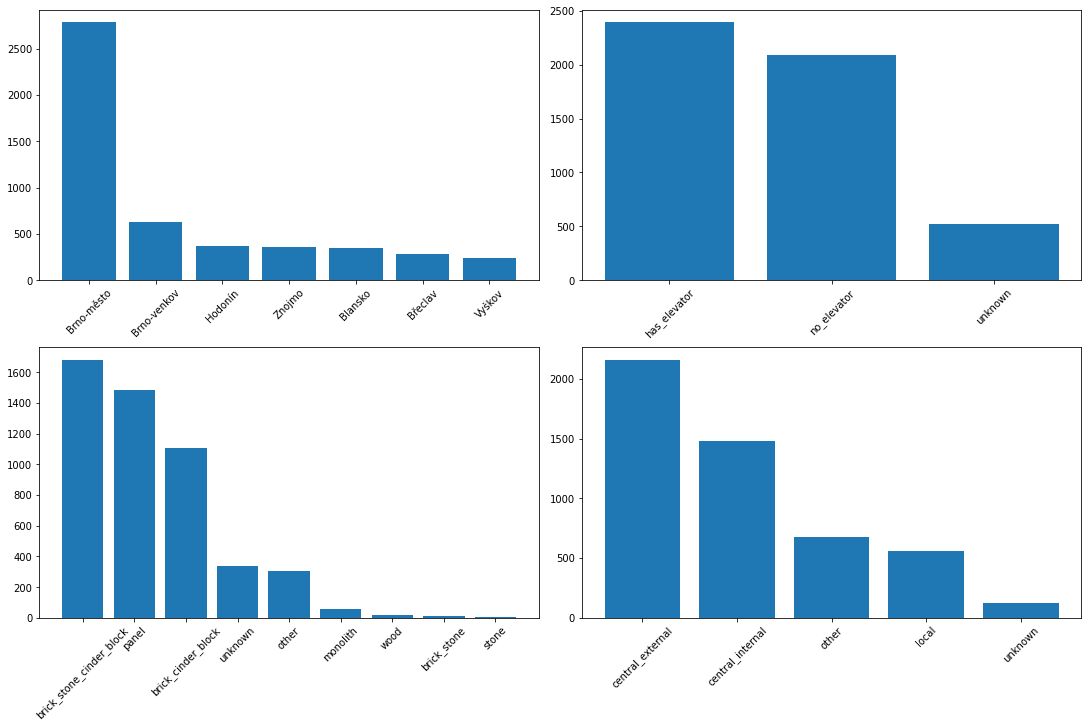

In [27]:
var_to_plot = ['districtName', 'constructionType', 'elevator', 'heatingKind']
fig, axs = plt.subplots(2,2, figsize = (15,10), constrained_layout=True)
ind_i = [0,1,0,1]
ind_j = [0,0,1,1]
for i,j, var in zip(ind_i, ind_j, var_to_plot):
        axs[i,j].bar(df[var].value_counts().index, df[var].value_counts().values)
        axs[i,j].tick_params(axis='x', labelrotation=45)
        axs[i,j].tick_params(axis='x', labelrotation=45)

plt.savefig("qualvar_frequencies.png", dpi=400)

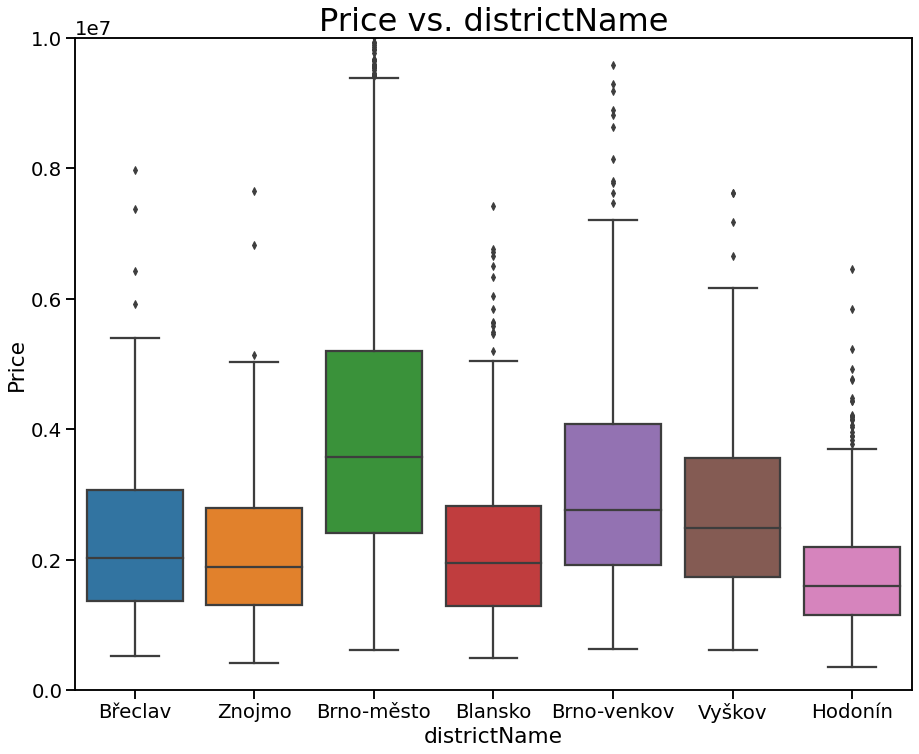

In [28]:
# Use box plot to see the relationship between district & price

# Set style to 'talk' for outputting figure
sns.set_context("talk", font_scale=1.2)

# Set figure size
plt.figure(figsize=(15,12))

# Plot data & add labels
fig = sns.boxplot(x='districtName', y='priceNoVat', data=df)
plt.title('Price vs. districtName',fontsize=32)
plt.xlabel('districtName')
plt.ylabel('Price');

# Set ymax to $6M for viewing. There are a few outliers up to around $8M.
fig.axis(ymin=0, ymax=10000000);

# Output and save figure
plt.savefig('price_vs_district.png', bbox_inches='tight')

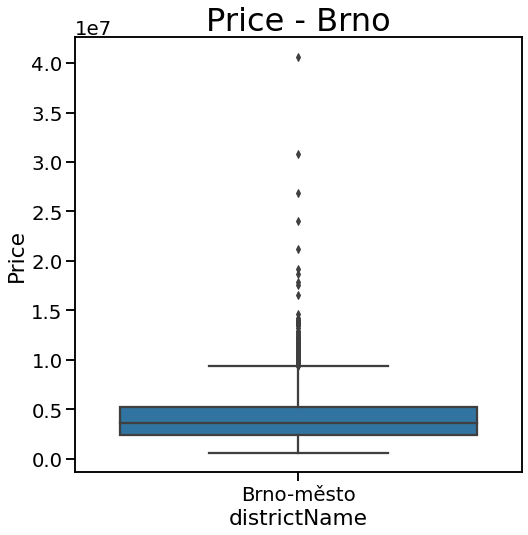

In [29]:
# Use box plot to see the relationship between district & price

# Set style to 'talk' for outputting figure
sns.set_context("talk", font_scale=1.2)

# Set figure size
plt.figure(figsize=(8,8))

# Plot data & add labels
fig = sns.boxplot(x='districtName', y='priceNoVat', data=df[df['districtName'] == 'Brno-město'])
plt.title('Price - Brno',fontsize=32)
plt.ylabel('Price');

# Set ymax to $6M for viewing. There are a few outliers up to around $8M.
#fig.axis(ymin=0, ymax=45000000);

# Output and save figure
plt.savefig('price_vs_district.png', bbox_inches='tight')

In [30]:
df[df['districtName'] == 'Brno']

,unitId,date,long,lat,area,priceNoVat,municipalityCode,municipalityName,districtCode,districtName,constructionType,elevator,finishedAt,heatingKind,floors,districtTown


# Quantitative variables
* date, long, lat, area, priceNoVat, finishedAt, floors
* floors - replace NaNs with values from adFloorscount
* Histograms
* outliers, mahalanobis distance
* Correlations
* New variable age (date - finishAt) in months, plus dummy variable recording if finishedAt is known or not

In [31]:
df.floors.isnull()[0]

False